### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import brentq
%matplotlib inline


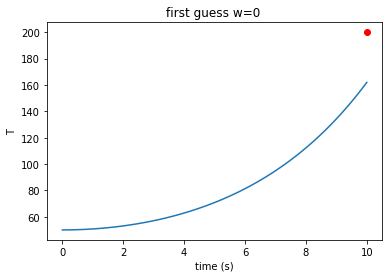

In [2]:
#variables 
alpha = .05
T_0 = 20

#initial conditions
T0 = 50 
w0 = 0


#boundary conditions 
Tf = 200 
tf = 10 


t = np.linspace(0, 10, 100)


def rhs(T, t): 
    return [ T[1], -(alpha)*(T_0 - T[0])] 

def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.plot(t, y[:, 0])
    # plot the boundary at t_final
    plt.plot(tf, yf, 'ro')
    plt.xlabel('time (s)')
    plt.ylabel('T')
    plt.title(title)
    plt.show()
    
plot_graph(f'first guess w={w0} ', odeint(rhs, [T0, w0], t), t, Tf, tf)

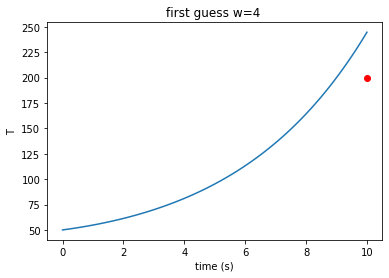

In [3]:
w0 = 4
plot_graph(f'first guess w={w0} ', odeint(rhs, [T0, w0], t), t, Tf, tf)

f(a)= -38.04979028333213
f(b)= 44.681068642451606
Optimized speed using shooting method is w=1.8396902901360896 


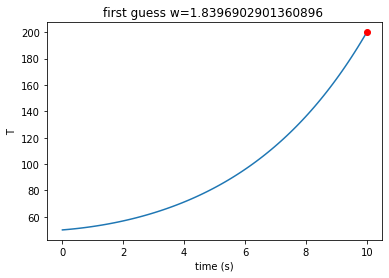

In [4]:
def objective_func(w0):
    sol = odeint(rhs, [T0, w0], t)
    T_final = sol[-1, 0]
    return T_final - Tf

print('f(a)=', objective_func(0))
print('f(b)=', objective_func(4))

w0 = brentq(objective_func, 0, 4)
print(f'Optimized speed using shooting method is w={w0} ')
plot_graph(f'first guess w={w0} ', odeint(rhs, [T0, w0], t), t, Tf, tf)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

In [5]:
n = 100
h = (10-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -(alpha*(h**2) + 2)
    A[i, i+1] = 1

print(A)

[[ 1.      0.      0.     ...  0.      0.      0.    ]
 [ 1.     -2.0005  1.     ...  0.      0.      0.    ]
 [ 0.      1.     -2.0005 ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ... -2.0005  1.      0.    ]
 [ 0.      0.      0.     ...  1.     -2.0005  1.    ]
 [ 0.      0.      0.     ...  0.      0.      1.    ]]


In [8]:
# Get b
b = np.zeros(n+1)
b[0] = 50
b[1:-1] = -alpha*T_0*h**2
b[-1] = 200
print(b)

[ 5.e+01 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02 -1.e-02
 -1.e-02  2.e+02]


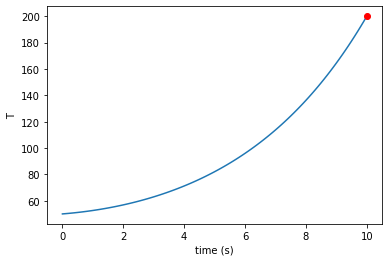

In [9]:
# solve the linear equations A x = b
y = np.linalg.solve(A, b)

t = np.linspace(0, 10, n+1)

plt.plot(t, y)
plt.plot(tf, Tf, 'ro')
plt.xlabel('time (s)')
plt.ylabel('T')
plt.show()